In [33]:
from rdkit import Chem
from rdkit.Chem import AllChem
import os
import os.path as osp
def read_sdf(sdf_file):
    supp = Chem.SDMolSupplier(sdf_file)
    mols_list = [i for i in supp]
    return mols_list

def write_sdf(mol_list,file):
    writer = Chem.SDWriter(file)
    for i in mol_list:
        writer.write(i)
    writer.close()

### Perform fingerprint similarity clustering

In [ ]:
mols = read_sdf('./parp7frag.sdf')

# Calculate the similarity matrix
fingerprints = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048) for mol in mols]
from rdkit import DataStructs

similarity_matrix = []
for i in range(len(fingerprints)):
    row = []
    for j in range(len(fingerprints)):
        similarity = DataStructs.TanimotoSimilarity(fingerprints[i], fingerprints[j])
        row.append(similarity)
    similarity_matrix.append(row)


In [36]:
# Perform hierarchical clustering
from scipy.cluster.hierarchy import linkage, fcluster

Z = linkage(similarity_matrix, 'ward')
num_cluster = 10
# Create clusters (e.g., create 10 clusters)
clusters = fcluster(Z, num_cluster, criterion='maxclust')

mol_clustered = [[] for i in range(10)]
for i, cluster_id in enumerate(clusters):
    mol_clustered[cluster_id-1].append(mols[i])

Successfully saved clustered molecules at ./cluster


In [ ]:
# save clustered molecules
save_dir = './cluster'
os.makedirs(save_dir, exist_ok=True)
for cluster_id, cluster in enumerate(mol_clustered):
    write_sdf(cluster, osp.join(save_dir, f'{cluster_id}.sdf'))
print('Successfully saved clustered molecules at {}'.format(save_dir))

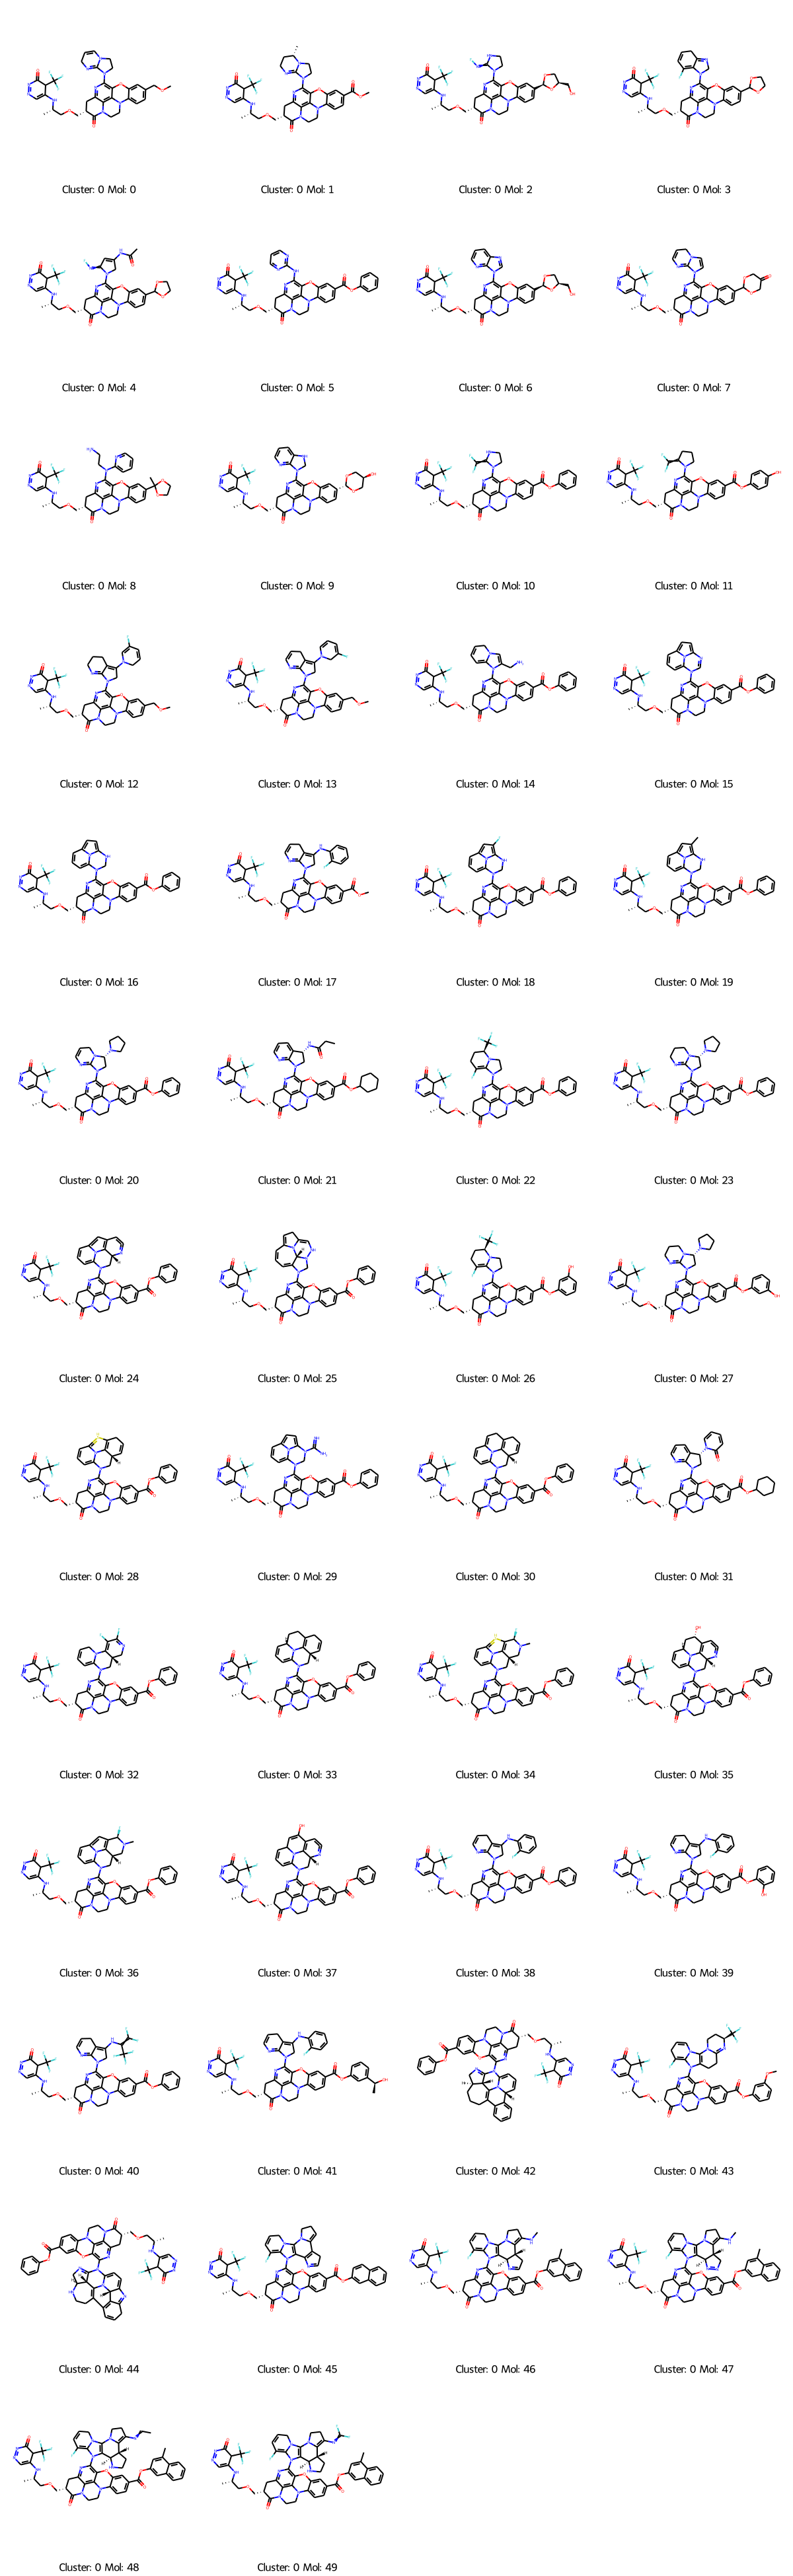

In [61]:
# show 2d Molecules
from rdkit.Chem import Draw
from copy import deepcopy

show_cluster_id = 0
show_mols = deepcopy(mol_clustered[show_cluster_id])
[i.RemoveAllConformers() for i in show_mols]

# Create a list of legends (labels) for your molecules
legends = [f"Cluster: {show_cluster_id} Mol: {molecule_index}" for molecule_index in range(len(show_mols))]

img = Draw.MolsToGridImage(show_mols, molsPerRow=4, subImgSize=(300,300), legends=legends)
img


### Perform Scaffold fingerprint similarity clustering

In [51]:
# Extracting scaffolds from molecules
from rdkit.Chem.Scaffolds import MurckoScaffold

scaffolds = [MurckoScaffold.GetScaffoldForMol(mol) for mol in mols]
scaffold_fingerprints = [AllChem.GetMorganFingerprintAsBitVect(scaffold, 2, nBits=2048) for scaffold in scaffolds]


In [52]:
# Calculate the scaffold similarity matrix of the molecules in the dataset
similarity_matrix = []
for i in range(len(scaffold_fingerprints)):
    row = []
    for j in range(len(scaffold_fingerprints)):
        similarity = DataStructs.TanimotoSimilarity(scaffold_fingerprints[i], scaffold_fingerprints[j])
        row.append(similarity)
    similarity_matrix.append(row)


In [53]:
# Hierarchical clustering
from scipy.cluster.hierarchy import linkage, fcluster

Z = linkage(similarity_matrix, 'ward')

# Create clusters (e.g., create 10 clusters)
clusters = fcluster(Z, 10, criterion='maxclust')
# Create clusters (e.g., create 10 clusters)
clusters = fcluster(Z, num_cluster, criterion='maxclust')

mol_clustered = [[] for i in range(10)]
for i, cluster_id in enumerate(clusters):
    mol_clustered[cluster_id-1].append(mols[i])

In [50]:
# save clustered molecules

save_dir = './cluster'
os.makedirs(save_dir, exist_ok=True)
for cluster_id, cluster in enumerate(mol_clustered):
    write_sdf(cluster, osp.join(save_dir, f'scaffold_{cluster_id}.sdf'))
print('Successfully saved clustered molecules at {}'.format(save_dir))

Successfully saved clustered molecules at ./cluster


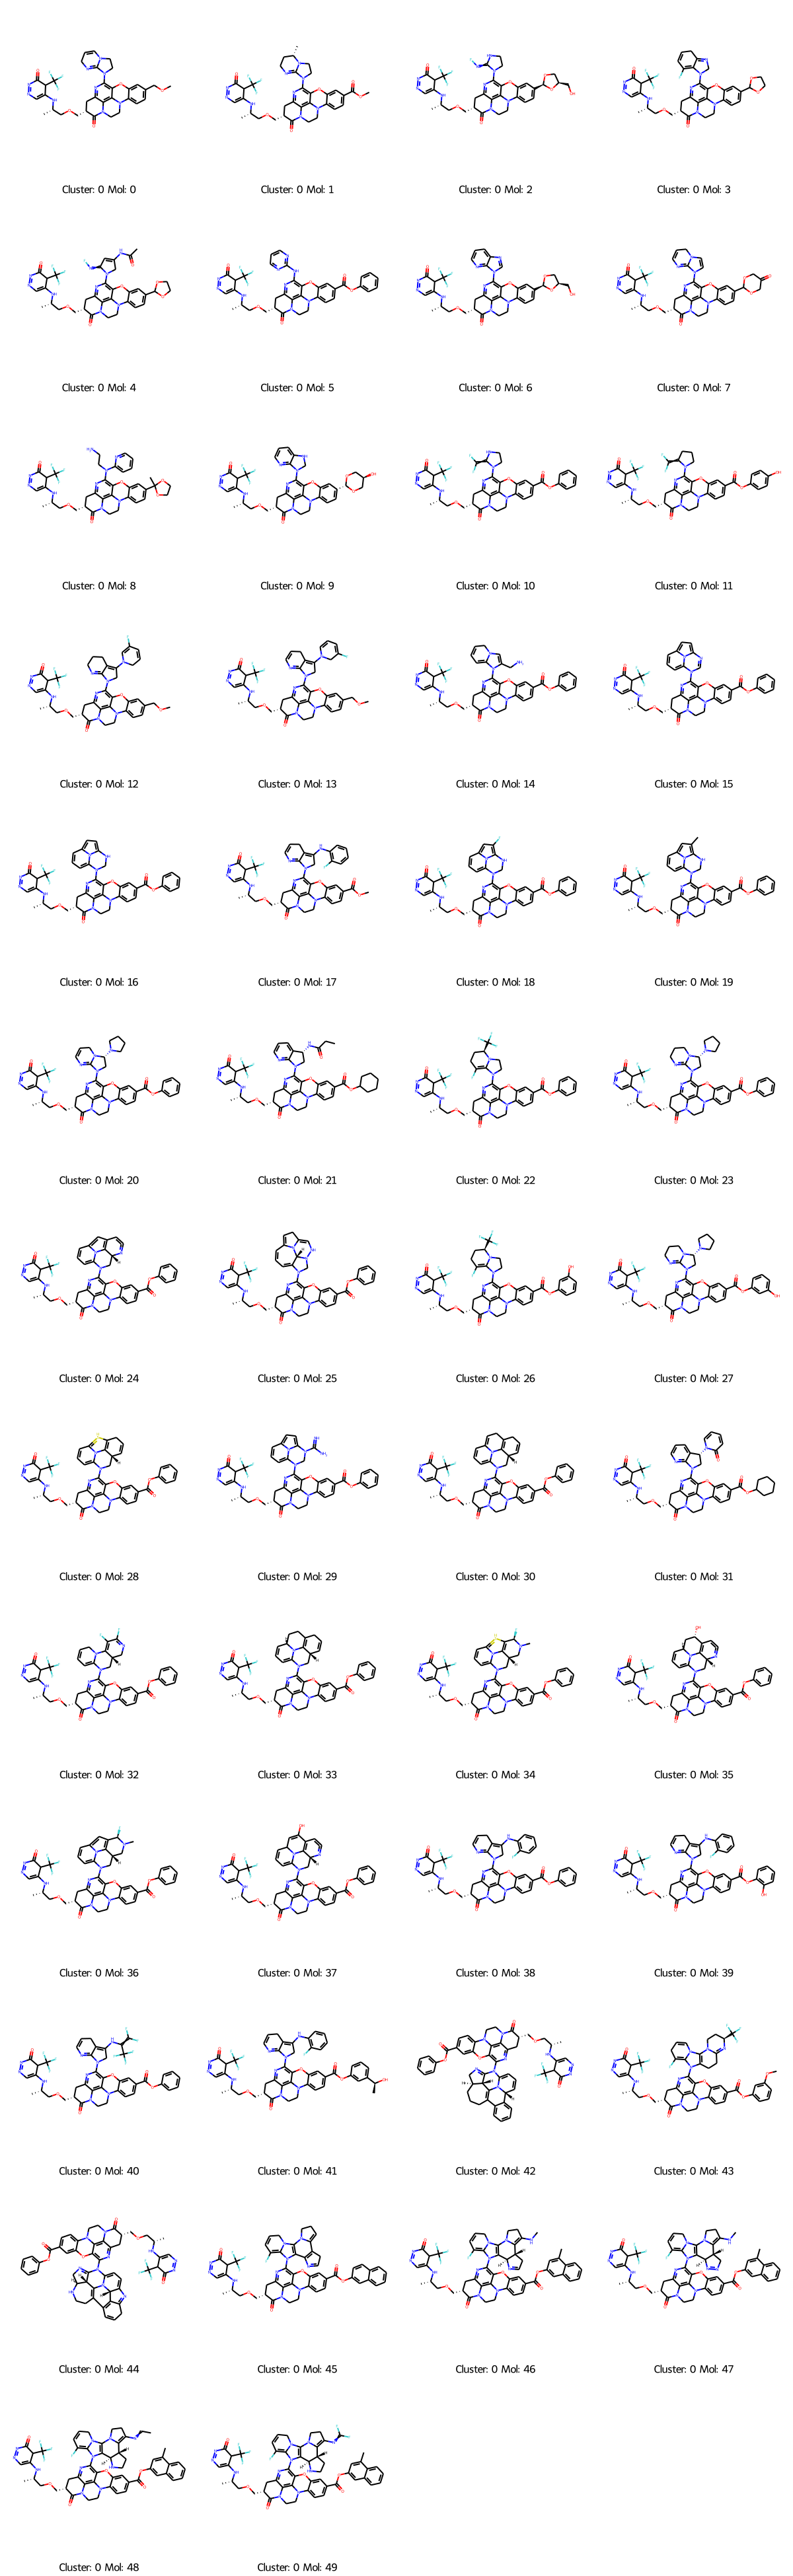

In [60]:
from rdkit.Chem import Draw
from copy import deepcopy

show_cluster_id = 0
show_mols = deepcopy(mol_clustered[show_cluster_id])
[i.RemoveAllConformers() for i in show_mols]

# Create a list of legends (labels) for your molecules
legends = [f"Cluster: {show_cluster_id} Mol: {molecule_index}" for molecule_index in range(len(show_mols))]

img = Draw.MolsToGridImage(show_mols, molsPerRow=4, subImgSize=(300,300), legends=legends)
img
